In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron

In [12]:
def plot_separator(X, y):
    fig, axs = plt.subplots(2, 3, constrained_layout=True ,figsize=(12,8))
    for ax, title, clf in zip(axs.ravel(), ModelTitles, Models):
        # fit the model, don't regularize for illustration purposes
        clf.fit(X, y)
        if not isinstance(clf , GaussianNB):
            print("{} => W=[{:.2f} , {:.2f}] , b=[{:.2f}]".format(title,clf.coef_[0,0],clf.coef_[0,1],clf.intercept_[0]))

        ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 1")
        ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 2")

        # plot the decision function
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 1000)
        yy = np.linspace(ylim[0], ylim[1], 1000)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf.predict(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z)
        ax.set_title(title)
        ax.legend()
    plt.show()


Models = [GaussianNB(), SGDClassifier('epsilon_insensitive' ,epsilon=0,alpha=0, learning_rate='adaptive',eta0=0.01),
          SGDClassifier('squared_error' ,alpha=0, learning_rate='adaptive',eta0=0.01),
          svm.SVC(kernel="linear",C=1), LogisticRegression(), Perceptron()]
ModelTitles = ["Naive Bayes", "MAE", "MSE", "SVM", "Logistic Regression", "Perceptron"]



**A)**

MAE => W=[-0.40 , 0.41] , b=[0.02]
MSE => W=[-0.45 , 0.46] , b=[-0.01]
SVM => W=[-1.00 , 1.00] , b=[-0.00]
Logistic Regression => W=[-1.25 , 1.25] , b=[-0.00]
Perceptron => W=[-2.00 , 2.00] , b=[0.00]


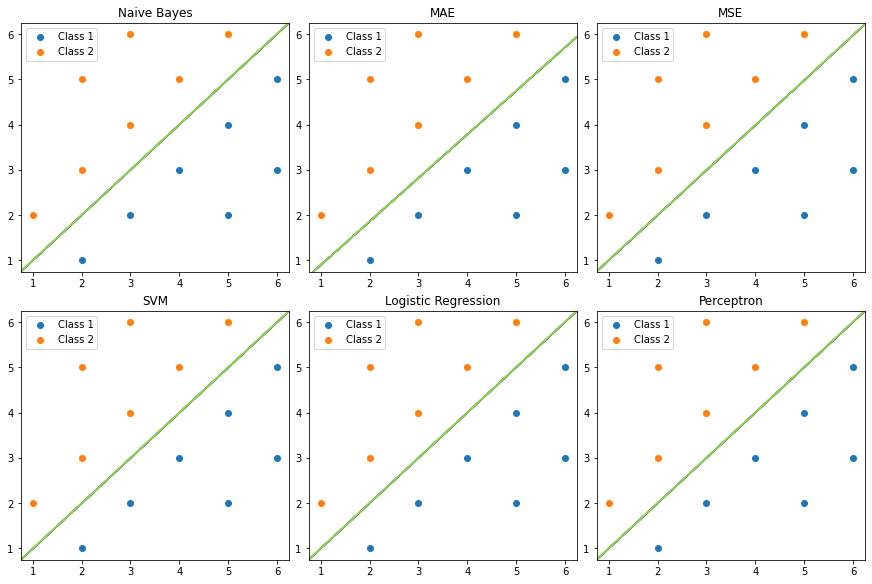

In [13]:
X_A = np.array([[2, 1], [4, 3], [3, 2], [6, 5], [5, 4], [5, 2], [6, 3],
                [1, 2], [3, 4], [2, 3], [5, 6], [4, 5], [2, 5], [3, 6], ])
y_A = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
plot_separator(X_A, y_A)



**B)**

MAE => W=[-0.32 , 0.34] , b=[-0.05]
MSE => W=[-0.27 , 0.32] , b=[-0.06]
SVM => W=[-1.00 , 1.00] , b=[-0.00]
Logistic Regression => W=[-1.25 , 1.25] , b=[0.00]
Perceptron => W=[-9.00 , 9.00] , b=[1.00]


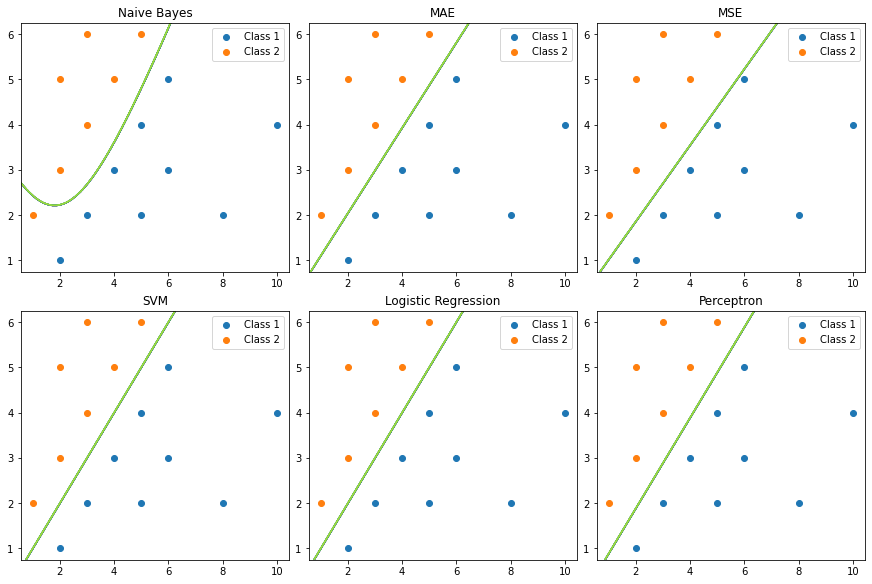

In [14]:
X_B = np.vstack([X_A, [[8, 2], [10, 4]]])
y_B = np.hstack([y_A, [0, 0]])
plot_separator(X_B, y_B)


**C)**

MAE => W=[-0.19 , 0.18] , b=[-0.01]
MSE => W=[-0.16 , 0.08] , b=[0.11]
SVM => W=[-0.60 , 0.20] , b=[1.20]
Logistic Regression => W=[-0.55 , 0.13] , b=[1.07]
Perceptron => W=[-2.00 , 7.00] , b=[6.00]


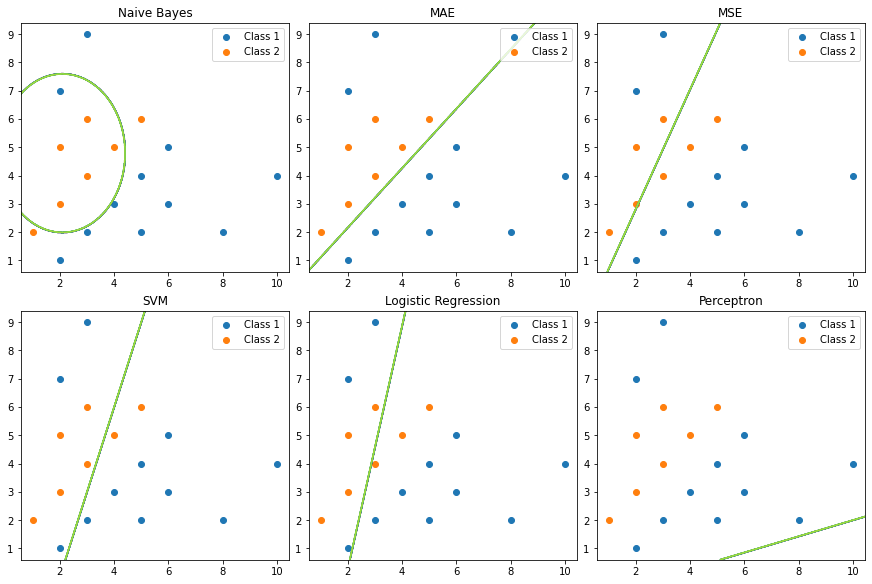

In [15]:
X_C = np.vstack([X_B, [[2, 7], [3, 9]]])
y_C = np.hstack([y_B, [0, 0]])
plot_separator(X_C, y_C)